In [1]:
import pandas as pd
import numpy as np
#from scipy.stats import norm, skew

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

#just  incase, i am importing warnings incase they throw me some annoying errors

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
new = housing.longitude.abs()

housing['Longitude'] = new
housing1 = housing.drop(['longitude'], axis=1)
housing1.head()


,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Longitude
0,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,122.23
1,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,122.22
2,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,122.24
3,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,122.25
4,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,122.25


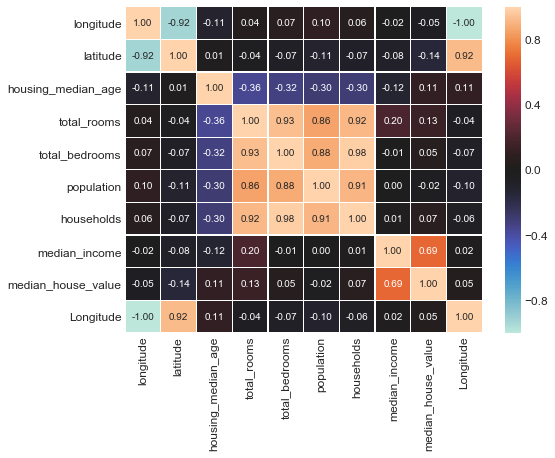

In [4]:
cormatx = housing.corr()
#f, ax = plt.subplots(figsize=(5,4))
#sns.heatmap(cormatx, square=True)
plt.subplots(figsize=(8,6))
sns.heatmap(cormatx, center=0, annot=True, fmt='.2f', linewidths=.3)

In [5]:
#newpop = housing['population'].drop_duplicates()
#newinc = housing['median_income'].drop_duplicates()
#newval = housing['median_house_value'].drop_duplicates()                              

#newpop1= newpop[:3001]
#newinc1= newinc[:3001]
#newval1= newval[:3001]

#newhouse = pd.DataFrame({'population':newpop1, 'income':newinc1,'value':newval1})

#dfnp = newhouse['population'].drop_duplicates()
#dfni = newhouse['income'].drop_duplicates()
#dfnv = newhouse['value'].drop_duplicates()
#len(dfnv)
#df = newhouse.pivot(index=dfnv, columns=dfni, values=dfnp)
# valuable lesson learnt.

In [6]:
cormatx #showing correlatin values rather than colors

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Longitude
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-1.000000
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.924664
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.108197
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.044568
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.069608
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.099773
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.055310
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.015176
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.045967
Longitude,-1.000000,0.924664,0.108197,-0.044568,-0.069608,-0.099773,-0.055310,0.015176,0.045967,1.000000


In [7]:
housing1.isnull().sum()# i know total_bedrooms has 207 missing rows,  
                         #but i would get the percentage by multiplying it the total and deviding by 100

latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
Longitude               0
dtype: int64

In [8]:
# now time to pairplot out numeric columns wrt the categrical, to show relationships
hpplot = housing1.drop(['total_bedrooms'], axis = 1)
#sns.pairplot(hpplot, hue='ocean_proximity', markers=['o', 's', 'd', '+', 'x'])
#plt.show()



# so this pairplot gave me issues at first, you would have to wriye a fpr loop if you have multiple categprocal 
#variables but if it is just one, you run on the fly. 

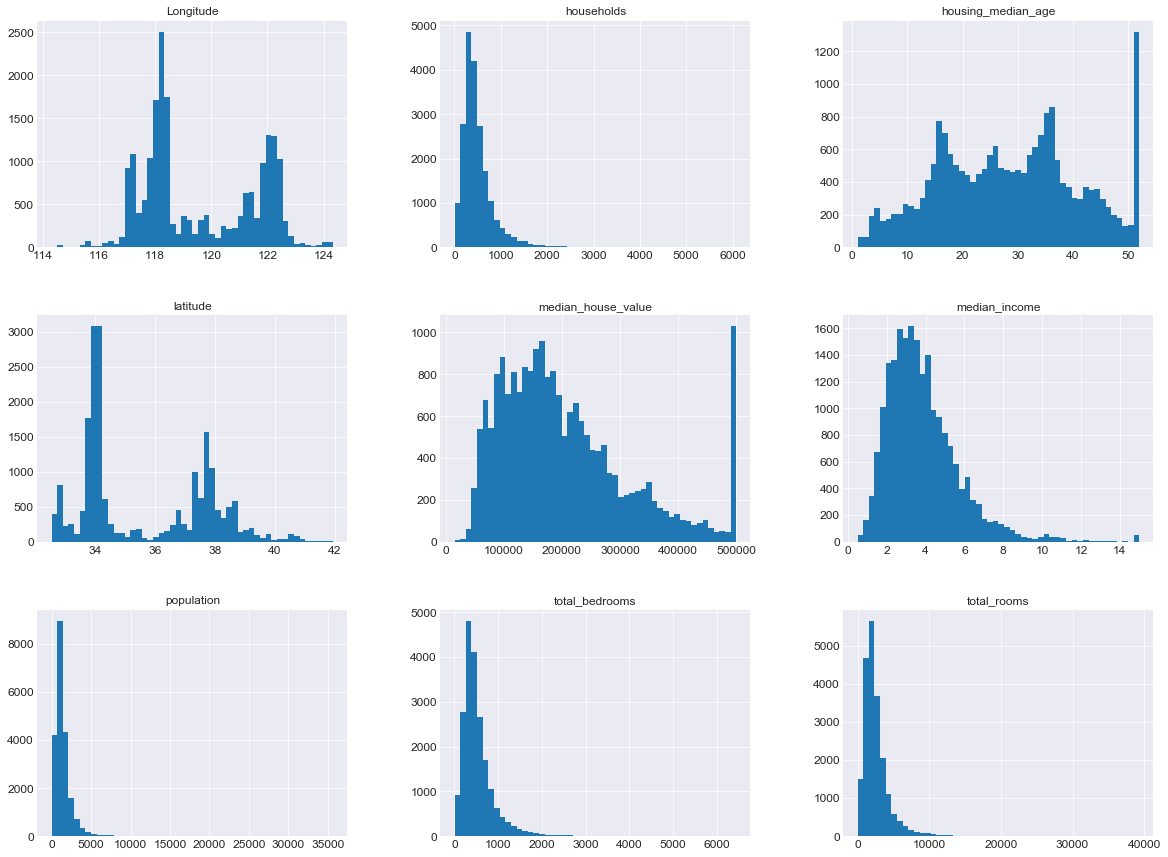

In [9]:
#%matplotlib inline
housing1.hist(bins=50, figsize=(20,15))
#plt.rcParams['axes.labelsize'] = 18
#plt.rcParams['xtick.labelsize'] = 16
#plt.rcParams['ytick.labelsize'] = 16
plt.show()

In [10]:
#So it is very important to create a test-set forget what you think  you know at the stage
#....in your work the next step in your pipeliine should be to set aside a test set afterall
# youve taken a quick glance at the dataset. 

#creating a testset is easy. use numpy to create some instances and set aside a percentage
#of your dataset. prebably 20 or 30. and go with the no peeking policy called data snooping bias
#set a random seed. so in subsequent runs u would get the same results
#ive imported numpy, its past 2am i feel like typing more
"""you can also make a write up on how i learn other people's code by retyping and editing parameters
as well as changing variable names. that way its easier to learn rather than just copying and pasting codes"""

train_set, test_set = train_test_split(housing1, test_size=0.2, random_state=42)

test_set.shape #although this would be useless as i would get a strat_train and test respectively and its a random seed

(4128, 10)

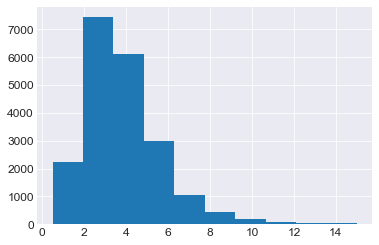

In [11]:
housing1.median_income.hist()
plt.show()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

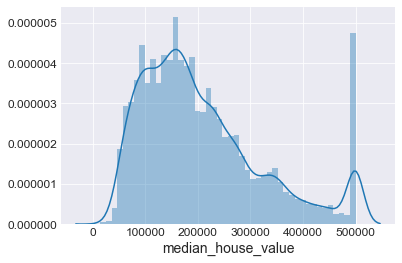

In [12]:
sns.distplot(housing1.median_house_value)
plt.show()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [13]:
#housing1.median_income.describe()

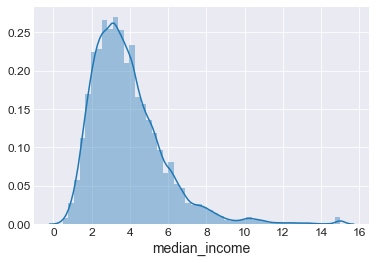

In [14]:
sns.distplot(housing1.median_income)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.show()

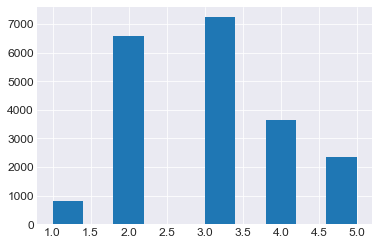

In [15]:
"""so to create a stratified bias free train and test, we create an 
income category of 5 category (strata) so sample would be drawn from 
those 5 categories(stratum). i mean that is what stratified sampling is all about. i would 
be dividing the income category by 1.5 to limit the number of categoriess"""

housing1['med_inc_cat'] = np.ceil(housing['median_income'] / 1.5)
a = housing1['med_inc_cat'].where(housing1['med_inc_cat'] < 5, 5.0, inplace=True)   #shit i could just as well map 1
                                                                                    #to 2 and make it 4 stratas
                                                                                                        
housing1['med_inc_cat'].hist()
#housing1.head()
plt.show()
#plt.rcParams['axes.labelsize'] = 14
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 12
#housing1['med_inc_cat'].value_counts().sort_index()

In [16]:
d = housing1.med_inc_cat.value_counts().sort_index()
df = housing1.med_inc_cat.value_counts().sort_values(ascending=False)
print( d,'\n \n',df )

1.0     822
2.0    6581
3.0    7236
4.0    3639
5.0    2362
Name: med_inc_cat, dtype: int64 
 
 3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: med_inc_cat, dtype: int64


In [17]:
corr = housing1.corr()
corr['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
med_inc_cat           0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
Longitude             0.045967
population           -0.024650
latitude             -0.144160
Name: median_house_value, dtype: float64

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing1, housing1["med_inc_cat"]):
    strat_train_set = housing1.loc[train_index]
    strat_test_set = housing1.loc[test_index]


## voila so this worked!!!!
strat_train_set.head()   #visualising the trainset you notice the med_inc_cat attribute. its not important and
                      #and should be dropped

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Longitude,med_inc_cat
17606,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,121.89,2.0
18632,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,121.93,5.0
14650,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,117.20,2.0
3230,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,119.61,2.0
3555,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,118.59,3.0


In [19]:
def income_cat_props(data):
    return data['med_inc_cat'].value_counts() / len(data)


train_set, test_set = train_test_split(housing1, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_props(housing1),
    "Stratified": income_cat_props(strat_test_set),
    "Random": income_cat_props(test_set),
}).sort_index()


compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [20]:
for set in (strat_train_set, strat_test_set):
    set.drop('med_inc_cat', axis=1, inplace=True)

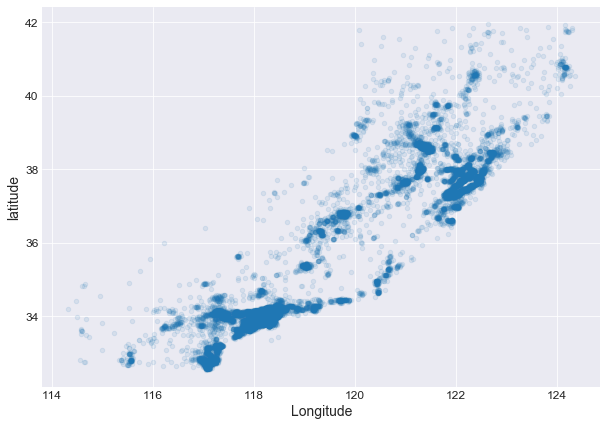

In [21]:
housing = strat_train_set
housing.plot(kind='scatter', x='Longitude',y='latitude', alpha=0.1, figsize=(10,7))
plt.show()
#housing.head()

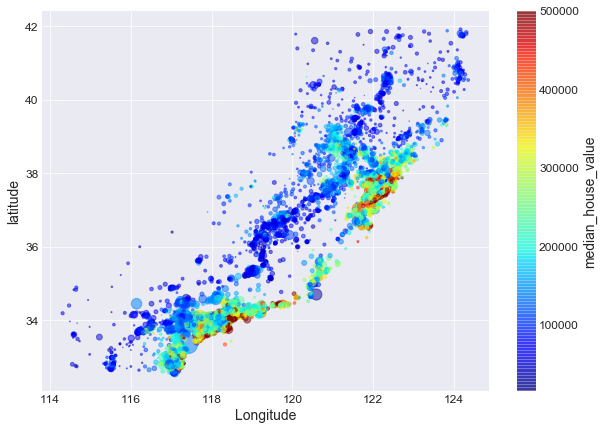

In [22]:
housing = strat_train_set
housing.plot(kind='scatter', x='Longitude',y='latitude', alpha=0.5, figsize=(10,7),
             s=housing['population']/100, c='median_house_value',
             cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.show()
#housing.head()

[0, 25, 0, 550000]

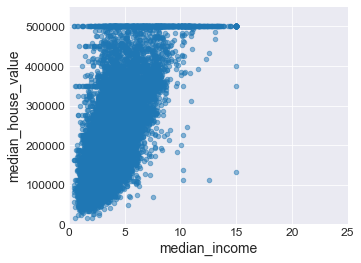

In [23]:
housing.plot(kind='scatter', x='median_income',y='median_house_value', alpha=0.5, figsize=(5,4))
plt.axis([0, 25, 0, 550000])

In [24]:
# creating new attributes from new ones i.e feature engineering
#housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
#housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
#housing["population_per_household"]=housing["population"]/housing["households"]

#hocorr = housing.corr()
#hocorr['median_house_value'].sort_values(ascending=False)    #showing us that the new columns we made 
                                                             #we made is not for waste. i am actually thinking of
                                                             #what would happen if i combined two non correlated 
                                                             #attributes together. or seeing if there are more variables 
                                                              # that can be devided or added e.g lat and long. or population and something

In [25]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels =  strat_train_set['median_house_value'].copy()
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [26]:
housing.describe()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Longitude
count,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,119.575834
std,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,2.001860
min,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,114.310000
25%,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,118.010000
50%,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,118.510000
75%,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,121.800000
max,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,124.350000


In [27]:
rows_missing_data = housing.isnull().any()  # checking the dataframe for missing values
housing.isnull().sum()

latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
Longitude               0
dtype: int64

In [28]:
incpt = housing[housing.isnull().any(axis=1)]
incpt.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Longitude
4629,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,118.30
6068,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,117.86
17923,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,121.97
13656,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,117.30
19252,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,122.79


In [29]:
# creating an sklearn IMPUTER class for replacing missing values.

from sklearn.preprocessing import Imputer
# instantiate the class
imputer = Imputer(strategy='median')

#since the housing dataset has a categorical column you should drop it since the imputer class
#works on only numerical or quantitative variables.

housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Longitude
17606,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,121.89
18632,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,121.93
14650,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,117.20
3230,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,119.61
3555,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,118.59


In [30]:
# after dropping the categorical column the next thing is to fit the training data

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [31]:
imputer.statistics_  # all the median values of all categories are stored in statistics_

array([  34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,  408.    ,
          3.5409,  118.51  ])

In [32]:
X = imputer.transform(housing_num) # its in an array that needs to be converted to a dataframe

In [33]:
housing_transformed = pd.DataFrame(X, columns = housing_num.columns)
housing_transformed.isnull().any() # check for missing values in columns

latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
Longitude             False
dtype: bool

In [34]:
'''FROM HERE ON WE WOULD BE HANDLING THE TEXT AND CATEGORICAL COLUMNS BECAUSE WE CANT JUST PASS CATEGORIVCAL 
VALUES TO A MACHINE LEARNING PREDICTOR, AND TO THIS WE WOULD USE THE SCIKIT-LEARN LABELENCODER CLASS'''

'FROM HERE ON WE WOULD BE HANDLING THE TEXT AND CATEGORICAL COLUMNS BECAUSE WE CANT JUST PASS CATEGORIVCAL \nVALUES TO A MACHINE LEARNING PREDICTOR, AND TO THIS WE WOULD USE THE SCIKIT-LEARN LABELENCODER CLASS'

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()   # we first encode the values with numbers be4 they are fed to model
housing_cat = housing['ocean_proximity']
housing_cat_enc = encoder.fit_transform(housing_cat)
housing_cat_enc
#encoder.classes_

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [36]:
'''fromm the cell above we notice that there a only four classes and some classes are more than the others. 

this could lead to bias if its not checked. we need to create a binary category for each of the class. OneHotEnccoder
to the rescue. and OneHotEncoder can only work if we have already encoded the categorical column or columna with 
LabelEncoder.
'''

'fromm the cell above we notice that there a only four classes and some classes are more than the others. \n\nthis could lead to bias if its not checked. we need to create a binary category for each of the class. OneHotEnccoder\nto the rescue. and OneHotEncoder can only work if we have already encoded the categorical column or columna with \nLabelEncoder.\n'

In [37]:
from sklearn.preprocessing import OneHotEncoder
# do a tutorial on working with categorical variables
encoder = OneHotEncoder(sparse=False) #pass the sparse=false arg to output a numpy array
housing_cat_1hot = encoder.fit_transform(housing_cat_enc.reshape(-1, 1))
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [38]:
#housing_cat_1hot.toarray() # if you notice in the cell above the output is in a sparse sciPy matrix, wasting memory space
                        # what we want to do in actual sense to to feed the model an array or a dataframe not a matrix
                        # we also want to minimise space.

In [39]:
# let me burst your bubble, all these two steps of labelEncoding and OneHotEncoding can be combined into one single 
# step with LabelBinerizer and very neatly in just three lines.

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()  #sparse_output=True to get a sciPy sparse matrix
housing_tr = encoder.fit_transform(housing_cat)
housing_tr.shape

# this thing show me pepper ehn, if you dont want to use pipelines u can do things this way sha

(16512, 5)

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin   #creating a custom classifier 4 our FE
#  READ UP ON CREATING YOUR CUSTOM CLASSIFIERS IN SKLEARN, i must be a beast oooo... no more mediocre life for me again IJN, AMEN
# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
#housing.values

In [41]:
# Sending the output of the custom classfier to a dataframe
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                     columns=list(housing.columns)+["rooms_per_household",
                                                                    "population_per_household"])
housing_extra_attribs.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Longitude,rooms_per_household,population_per_household
0,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,121.89,129.798,125.361
1,37.05,14,679,108,306,113,6.4214,<1H OCEAN,121.93,16.8188,17.5974
2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,117.2,164.564,161.42
3,36.31,25,1847,371,1460,353,1.8839,INLAND,119.61,196.932,187.377
4,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,118.59,502.521,482.09


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# creating a pipeeline for all the numerical attriibutes of the dataset first
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
     ('attrib_adder',CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

houaing_num_transform=(num_pipeline.fit_transform(housing_num))
#houaing_num_transform

In [43]:
list(housing_num)

['latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'Longitude']

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

# so whats happening here is that i want to pass my dataframe to the pipeline i created earlier to fully automate the
#the process, so i create a custom transformation below that accepts the numerical values of the dataset still in df 
# form and coverts it to a numPy array since Scikit-Learn doesn't handle DataFrames yet

# dataframeselector would also make it poossible for u to select the categorical or numerical columns and which
# to pass into the dataframe.

#its still a process as i would still have to create a transformer for the categorical attributes too. and then combine
# those transformers later using sklearns FeatureUnion class

class DataFrameSelector(BaseEstimator, TransformerMixin):   #search on what these two does and how they work
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [45]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_prox"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

#so i found out that labelbinarizer had a bug, and then i changed it to onehotencoder, but i had to insert the numerica
#variables gotten from the labelencoder transsformation
housing['ocean_prox'] = housing_cat_enc
model_housing = housing.drop('ocean_proximity', axis=1)

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('one_hot_encoder', OneHotEncoder(sparse=False)),
    ])

#housingprep= cat_pipeline.fit_transform(model_housing)
#housingprep

In [46]:
# combining the categorical and numerical pipeline together using FeatureUnion
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [47]:
final_housing = full_pipeline.fit_transform(model_housing)
final_housing.shape

(16512, 16)

In [48]:
#final = pd.DataFrame(final_housing)
#final.head()
#model_housing.head()

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(final_housing, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
# taking some anyhow dataset from here
#some_kind_data = housing.iloc[:5]        finally learnt the use cases of pandas iloc() methods
#some_kind_label = housing_labels.iloc[:5]
#some_data_prep = full_pipeline.fit_transform(some_kind_data)
#some_data_prep

In [51]:
# LinearRegrassion Algorithm 
#rmse = 69036
#r2 = 64

from sklearn.metrics import mean_squared_error, r2_score
model_predictions = lr.predict(final_housing)
mse = mean_squared_error(housing_labels, model_predictions)
rmse = np.sqrt(mse)
rmse

#r2 score
#acc = r2_score(housing_labels, model_predictions)
#acc

69036.32451019084

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(final_housing, housing_labels)
tree_pred = dtr.predict(final_housing)

Treermse = mean_squared_error(housing_labels, tree_pred)
Treermse_score =np.sqrt(Treermse)
#Treermse_score

Tree_r2= r2_score(housing_labels, tree_pred)
Tree_r2

1.0

In [53]:
#  SO I AM LEARNING TO USE THE CROSS_VAL_SCORE NOW. IT TAKES IN THE CLF, TRAIN, TEST THEN U CAN FIND THE MEAN
# OF IT. to get the mean rmse, comment it out to get the r2
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtr, final_housing, housing_labels,
                       scoring='neg_mean_squared_error', cv=10)
trmse = np.sqrt(-score)


def show_result(score):         # Custom function to show scores, mean and std
    print('scores dT: ', score)
    print('')
    print('mean score dT: ',score.mean())
    print('')
    print('std dev: ', score.std())
    

show_result(trmse) # show the score, mean and std  for the tree algorithm

scores dT:  [71382.07716559 68739.02864547 72306.41644946 74413.02181602
 72023.78613202 77179.09775492 70651.66633008 70504.04601653
 73246.49649962 71761.58125312]

mean score dT:  72220.72180628339

std dev:  2212.1312197823577


In [54]:
from sklearn.linear_model import LinearRegression   #so far so good, linear regression has been better than DT
from sklearn.model_selection import cross_val_score
#, scoring='neg_mean_squared_error'
lr = LinearRegression()
score = cross_val_score(lr, final_housing, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10)
lr_score = np.sqrt(-score)

def show_result(score):         # Custom function to show scores, mean and std
    print('scores lr: ', score)
    print('')
    print('mean score lr: ',score.mean())
    print('')
    print('std dev lr: +/-', score.std())
    
show_result(lr_score)

scores lr:  [67469.28784592 67422.28193468 68356.19928133 74785.20131013
 68241.17784274 71620.02931289 65379.21201448 68578.87113789
 73052.42414895 68092.44973869]

mean score lr:  69299.71345677122

std dev lr: +/- 2753.0098942037293


In [55]:
# Yaay next i am trying Ensemble randomforestregressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# scoring='neg_mean_squared_error',
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, final_housing, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
rfr_score = np.sqrt(-scores)

def show_result(score):         # Custom function to show scores, mean and std
    print('scores lr: ', score)
    print('')
    print('mean score lr: ',score.mean())
    print('')
    print('std dev lr: ', score.std())
    
show_result(rfr_score)

scores lr:  [52778.84100211 51423.19198773 52582.23942047 55739.09666596
 53226.91840216 56253.12613469 51351.51351262 51564.48209218
 56152.06791909 54414.40806216]

mean score lr:  53548.588519917976

std dev lr:  1858.8044254425301


In [56]:
#  FINE TUNING MY MODELS!!! BUT BEFORE THIS LET ME TRY OUT A FEW MORE CLASSIFIERS

In [57]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [58]:
svm = svm.SVR()       # this svm asides from the fact that it underfitted, it took almost 2 minutes to run
#svm_scores = cross_val_score(svm, final_housing, housing_labels,
#                            scoring='neg_mean_squared_error', cv=10)
#svm_rmse = np.sqrt(-svm_scores)
#svm_rmse

In [59]:
# LETS GET REALLLLL!!

#from sklearn.ensemble import BaggingRegressor
#from sklearn.model_selection import cross_val_score
#bgc = BaggingRegressor(n_estimators=100)

#bgc_scores = cross_val_score(bgc, final_housing, housing_labels, cv=10)
#bgc_rmse = np.sqrt(-bgc_scores)

#def show_result(score):         # Custom function to show scores, mean and std
#    print('scores bgc: ', score)
#    print('')
#    print('mean score bgc: ',score.mean())
#    print('')
#    print('std dev bgc: ', score.std())
#bgc_scores.mean()       #i actually had 80.305044 when i ran this. but it took like 5 minutes plus my lappy wey
                        # we i dey manage got hot. i cant even start deeplearniing on this system rara. 

In [60]:
housing.columns

Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity',
       'Longitude', 'ocean_prox'],
      dtype='object')

In [61]:
#custom class to handle multiple categorical columns
#from sklearn.preprocessing import LabelEncoder
#class MultiEncoder:                   # class name
#    def __init__(self, columns=None):  # initialise with a constructor
#        self.columns = columns
        
#    def fit(self, X, y=None):          # Function to fit the X columns of the dataset showing that its for attributes 
#        return self                    # alone and y=None means the label is made silent

#    def transform(self, X):         # this is the function that does the main work of transforming
#        output = X.copy()
#        if self.columns is not None:
#            for col in self.columns:
#                output[col] = LabelEncoder().fit_transform(col)
#        else:
#            for colname, col in output.iteritems():
#                output[colname] = LabelEncoder().fit_transform(col)
#        return output
    
#    def fit_transform(self, X, y=None):
#        return self.fit(X, y).transform(X)
    

In [62]:
#col_transformer = MultiEncoder()
#fit = col_transformer.fit_transform(super_cat.astype(str))
#super_cat.Product_Type.shape
#fit.head()